# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [8]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [21]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for i in range(4):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    print(i)
    if i==0:
        
        optimizer = keras.optimizers.SGD(lr=lr)
        exp_name_tag = "SGD"
    elif i==1:
        optimizer = keras.optimizers.RMSprop(lr=lr)
        exp_name_tag = "RMSprop"
    elif i==2:
        optimizer = keras.optimizers.Adagrad(lr=lr)
        exp_name_tag = "Adagrad"
    elif i==3:
        optimizer = keras.optimizers.Adam(lr=lr)
        exp_name_tag = "Adam"

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    

    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
0
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

Epoch 49/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.7597 - accuracy: 0.7304 - val_loss: 1.8058 - val_accuracy: 0.4698
Epoch 50/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.7573 - accuracy: 0.7321 - val_loss: 1.8658 - val_accuracy: 0.4625
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

50000/50000 [==============================] - 7s 139us/step - loss: 2.3077 - accuracy: 0.1004 - val_loss: 2.3115 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.3076 - accuracy: 0.0997 - val_loss: 2.3126 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3082 - accuracy: 0.0994 - val_loss: 2.3194 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3079 - accuracy: 0.1012 - val_loss: 2.3201 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3077 - accuracy: 0.0992 - val_loss: 2.3165 - val_accuracy: 0.1000
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________

Epoch 44/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4093 - accuracy: 0.4955 - val_loss: 1.5404 - val_accuracy: 0.4557
Epoch 45/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4039 - accuracy: 0.5007 - val_loss: 1.5482 - val_accuracy: 0.4469
Epoch 46/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4010 - accuracy: 0.4999 - val_loss: 1.5436 - val_accuracy: 0.4515
Epoch 47/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3931 - accuracy: 0.5024 - val_loss: 1.5378 - val_accuracy: 0.4574
Epoch 48/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3915 - accuracy: 0.5028 - val_loss: 1.5767 - val_accuracy: 0.4450
Epoch 49/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3908 - accuracy: 0.5019 - val_loss: 1.5525 - val_accuracy: 0.4558
Epoch 50/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3805 - accuracy: 0.5072 - val_

Epoch 42/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3066 - accuracy: 0.0996 - val_loss: 2.3060 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3075 - accuracy: 0.0999 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3076 - accuracy: 0.1020 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3068 - accuracy: 0.1022 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.3064 - accuracy: 0.1001 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3069 - accuracy: 0.1006 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3067 - accuracy: 0.0969

'\n建立你的訓練與實驗迴圈並蒐集資料\n'

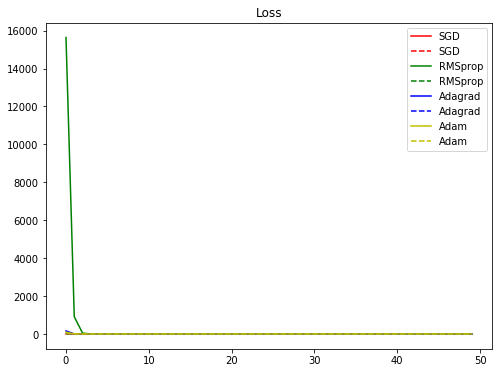

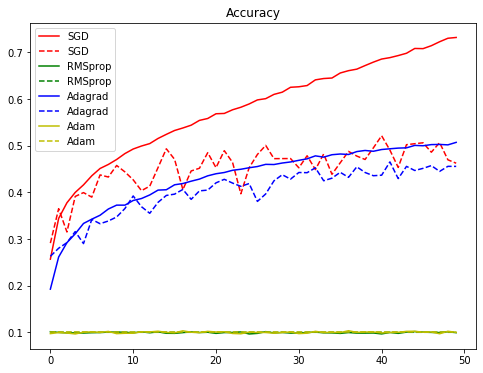

In [22]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()